In [1]:
# 1.import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [7]:
# 2.import the train data
data=pd.read_csv("/home/user/Downloads/Week7_train.csv")

In [8]:
# 3.check shape of the data
data.shape

(42000, 785)

In [9]:
# 4.Select only 10% of the data
data = data.sample(frac=0.1, random_state=42)


In [10]:
# 5.Print shape of selected dataset
print(data.shape)


(4200, 785)


In [14]:
# 6.Look at the top 5 rows
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 7.Find no. of unique class labels
print(data['label'].nunique())


10


In [15]:
# 8.Print the number of examples for each class label
print(data['label'].value_counts())



label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64


In [16]:
# 9.Prepare X and Y
X = data.drop('label', axis=1)
y = data['label']


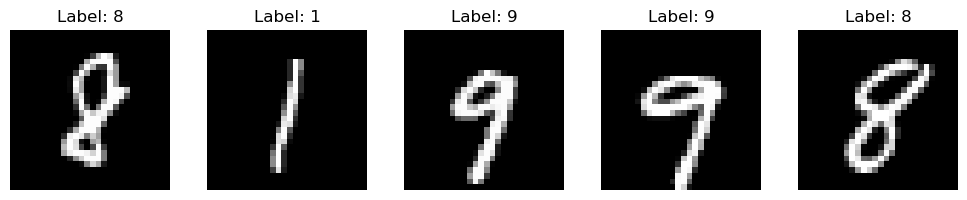

In [19]:
# 10.Visualize the first 5 digits in X and print class labels
plt.figure(figsize=(10, 2))  # width, height in inches

for i in range(5):
    img = X.iloc[i].values.reshape(28,28)
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns, ith plot
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis('off')  # to hide axes

plt.tight_layout()
plt.show()

In [20]:
# 11.Split into train and validation sets (75%-25%)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


In [21]:
# 12.Fit KNN classifier on training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [22]:
# 13.Default params: n_neighbors=5, metric=‘minkowski’, p=2
#  These are KNN’s default parameters.

In [23]:
# 14.Predict validation set results
y_pred = knn.predict(X_val)


In [24]:
# 15.Print the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred))


[[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [25]:
# 16.Print classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050

Accuracy: 0.9247619047619048


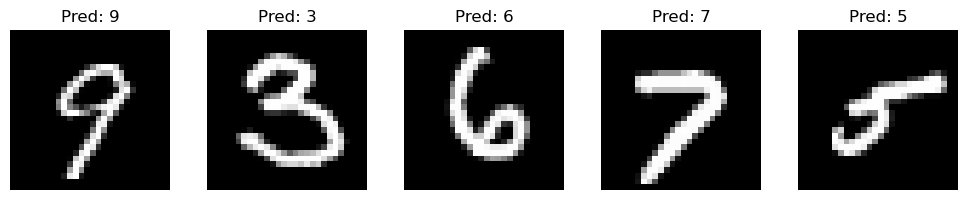

In [27]:
# 17.Visualize first 5 digits in X_test and print predicted labels
plt.figure(figsize=(10, 2))  # width=10 inches, height=2 inches

for i in range(5):
    img = X_val.iloc[i].values.reshape(28,28)
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')  # hide axes

plt.tight_layout()
plt.show()